In [1]:
import zarr
import xarray
import tifffile
import numpy as np
import pyometiff as ome

In [2]:
img_file = '/fastdata/tmp/SB001-T01-01-HE.ome.tiff'

In [8]:
img_src = tifffile.imread(img_file, aszarr=True)
z = zarr.open(img_src, mode='r')
tif = tifffile.TiffFile(img_file)

In [4]:
list(z.array_keys())

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']

In [5]:
z['10'].shape

(3, 166, 86)

[('Name', '/'),
 ('Type', 'zarr.hierarchy.Group'),
 ('Read-only', 'True'),
 ('Store type', 'zarr.storage.KVStore'),
 ('No. members', 11),
 ('No. arrays', 11),
 ('No. groups', 0),
 ('Arrays', '0, 1, 10, 2, 3, 4, 5, 6, 7, 8, 9')]

In [15]:
img_src.is_multiscales

True

In [24]:
x = z['5']

In [25]:
import matplotlib.pyplot as plt

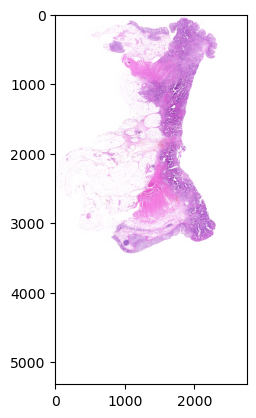

In [26]:
plt.imshow(np.moveaxis(x, [0], [2]))

In [27]:
ome_reader = ome.OMETIFFReader(fpath=img_file)

In [28]:
tif = tifffile.TiffFile(img_file)
omexml_string = tif.ome_metadata

In [30]:
ome_reader.omexml_string = omexml_string
info = ome_reader.parse_metadata(omexml_string)

key not found 'NoneType' object has no attribute 'iter'


In [34]:
axes = list(info['DimOrder'])

In [32]:
info

{'Directory': '/fastdata/tmp',
 'Filename': 'SB001-T01-01-HE.ome.tiff',
 'Extension': 'ome.tiff',
 'ImageType': 'ometiff',
 'TotalSeries': 2,
 'SizeX': 88218,
 'SizeY': 170180,
 'SizeZ': 1,
 'SizeC': 3,
 'SizeT': 1,
 'SizeS': 1,
 'SizeB': 1,
 'SizeM': 1,
 'PhysicalSizeX': 0.23387573964497,
 'PhysicalSizeXUnit': 'µm',
 'PhysicalSizeY': 0.234330708661417,
 'PhysicalSizeYUnit': 'µm',
 'Sizes BF': [2, 1, 1, 3, 170180, 88218],
 'DimOrder BF': 'XYZCT',
 'DimOrder BF Array': 'TCZYX',
 'ObjMag': '20.0',
 'ObjID': 'Objective:0:0',
 'DetectorModel': 'Hitachi_HV_F22CL',
 'DetectorID': 'Detector:0:0',
 'InstrumentID': 'Instrument:0',
 'Channels': {None: {'ID': 'Channel:0:2', 'SamplesPerPixel': 1}},
 'ImageIDs': [0, 1],
 'AcquisitionDate': '2016-10-25T10:43:32',
 'Name': '20x',
 'DimOrder': 'TCZYX'}

In [41]:
info['PhysicalSizeXUnit'] == 'µm'

True

In [37]:
axes = ''.join([a for a in axes if info['Size'+a] > 1]).lower()

In [39]:
list(axes).index('c')

0

In [ ]:
omexml_string

In [ ]:
from pyometiff import OMEXML

In [ ]:
o = OMEXML(omexml_string)

In [ ]:
md = ome_reader._get_metadata_template()

In [ ]:
o.image(0).AcquisitionDate